<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
# import os
# os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# Check keras and tensorflow versions
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

2024-01-09 22:57:36.815590: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Keras version:  2.15.0
Tensorflow version:  2.15.0


In [3]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import confusion_matrix

# import keras
from keras.datasets import cifar10

from keras.models import Sequential

from keras.layers import Dense       #core layers
from keras.layers import Dropout   #core layers
from keras.layers import Flatten    #core layers
from keras.layers import Conv2D              #convolution layers
from keras.layers import MaxPooling2D   #convolution layers
from keras import regularizers
from keras import optimizers

#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

In [4]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
# from keras.callbacks import TensorBoard

In [5]:
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [6]:
# insert code here

# CIFAR-10データセットをロード
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Check some data

In [7]:
# insert code here

#データの形状を確認
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

X_train: (50000, 32, 32, 3) y_train: (50000, 1)
X_test: (10000, 32, 32, 3) y_test: (10000, 1)


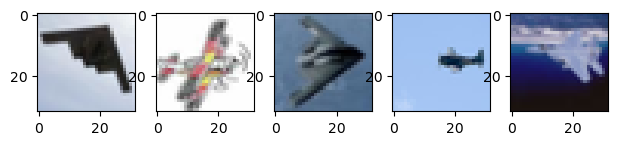

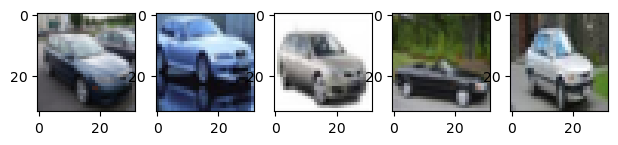

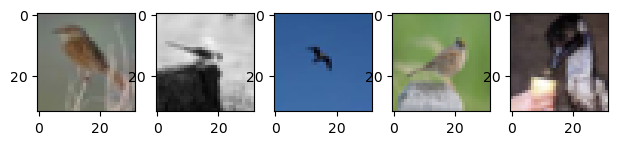

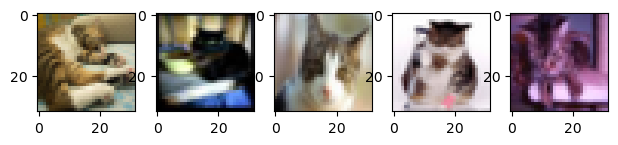

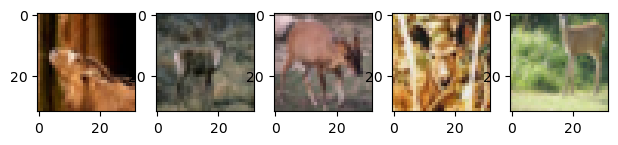

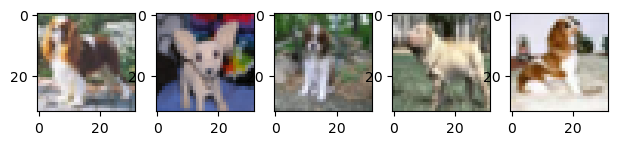

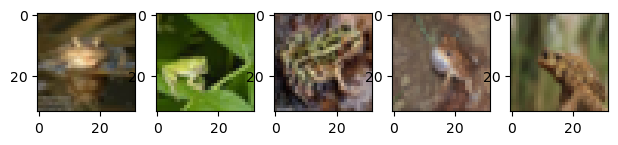

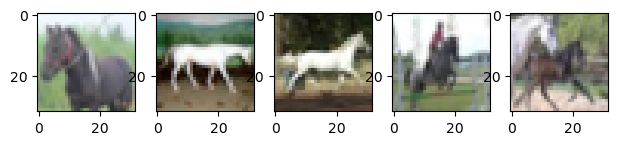

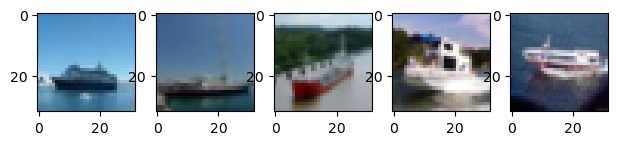

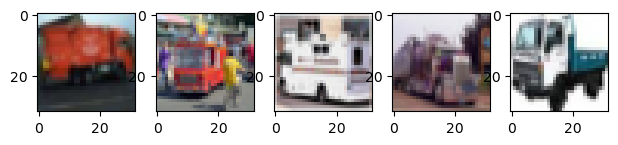

In [8]:
# 画像を描写
num_classes = 10  # 分類先の画像の数
pos = 1  # 画像の描写位置を保持する変数

for target_class in range(num_classes):  # クラスの数だけ繰り返す
    target_idx = []  # 各クラスに分類される画像のインデックスを保持するリスト
    for i in range(len(y_train)):  # クラスiが正解の場合の正解ラベルのインデックスを取得する
        if y_train[i][0] == target_class:  # i行、0列の正解ラベルがtarget_classと一致するか
            target_idx.append(i)  # クラスiが正解であれば、正解ラベルのインデックスをtarget_idxに追加
            
    np.random.shuffle(target_idx)  # クラスiの画像のインデックスをシャッフル
    plt.figure(figsize=(15, 15))  # 描画エリアを横20インチ、縦20インチにする
    
    for idx in target_idx[:5]:  # シャッフルした最初の5枚の画像を描画
        plt.subplot(10, 10, pos)
        plt.imshow(X_train[idx])
        pos += 1

plt.show()


## Prepare data

In [9]:
# insert code here

#X_train(ndarray):訓練データ(50000, 32, 32, 3)
#X_test(ndarray):テストデータ (10000, 32, 32, 3)
#y_train(ndarray):訓練データの正解ラベル(50000, 1)
#y_test(ndarray):テストデータの正解ラベル (10000, １)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [10]:
#訓練用とテスト用のデータを正規化する

X_train, X_test = X_train.astype('float32'), X_test.astype('float32')
X_train, X_test = X_train/255.0, X_test/255.0

In [11]:
#訓練データとテストデータの正解ラベルを１０クラスのOne-Hot表現に変換

#y_train: (50000, 10)
#y_test: (10000, 10)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [12]:
# insert code here

#正則化のパラメーターを設定
weight_decay = 1e-4

model = Sequential()

In [13]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

## Compile the model

In [15]:
# insert code here

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit the training data

In [ ]:
# Uncomment the statement below to allow online monitoring with TensorBoard

tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [ ]:
%%time

# insert code here


# cdgddgcvdgeygdcvdgyegdcvgdeygdcvdgeydgcvdgeygdcvdgeydgcvgdyedgcv
# ..., callbacks = [tensorboard], ...

history = model.fit(
    X_train,
    
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=100,
    callbacks=[tensorboard],
    verbose=0
)

print(f'Training accuracy: {history.history["accuracy"][-1]:.2f} validation accuracy: {history.history["val_accuracy"][-1]:.2f}')

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

## Create predictions

In [ ]:
%%time
predictions = model.predict_classes(X_test)

## Evaluate the model

In [ ]:
# insert code here

score = model.evaluate(X_test, y_test, batch_size = 10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

## Visualisation of cost

In [ ]:
# insert code here

plt.plot(history.history['loss'], marker = '.', label = 'loss(Training)')
plt.plot(history.history['val_loss'], marker = '.', label = 'loss(Validation)')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'], marker = '.', label = 'accuracy(Training)')
plt.plot(history.history['val_accuracy'], marker = '.', label = 'accuracy(Validation)')
plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Results

In [ ]:
# insert code here

check_one(X_test, predictions, actual = y_test, compare = True)

In [ ]:
check_ten(X_test, predictions, y_test, True)



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



